# Question1_yz1268

ps:the answer of homography matrix is in the second last block

In [70]:
import cv2
import numpy as np
import scipy
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import *


In [71]:
#https://github.com/rmislam/PythonSIFT
import cv2
#import urlib.parse as ulrparse
#import pysift
#from scipy.linalg import null_space
#from urlparse import urlparse


images = ['book.pgm', 'scene.pgm']
image_book = cv2.imread('book.pgm', 0)
image_scene = cv2.imread('scene.pgm', 0)

def SIFT(image):
    img = cv2.imread(image)
    img_raw = img
    sift = cv2.xfeatures2d.SIFT_create()
    kps, descs = sift.detectAndCompute(img, None)
    img_disp=cv2.drawKeypoints(img,kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return img_raw, img_disp, kps, descs

img_raw1, img_disp1, kp1, des1 = SIFT(images[0])
img_raw2, img_disp2, kp2, des2 = SIFT(images[1])
info1 = img_disp1, kp1, des1
info2 = img_disp2, kp2, des2

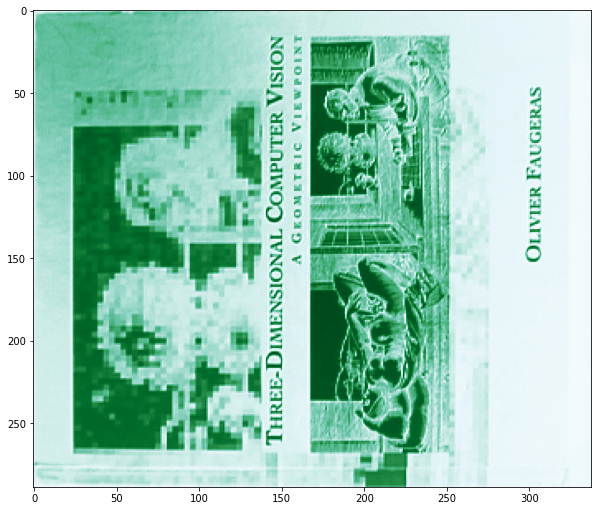

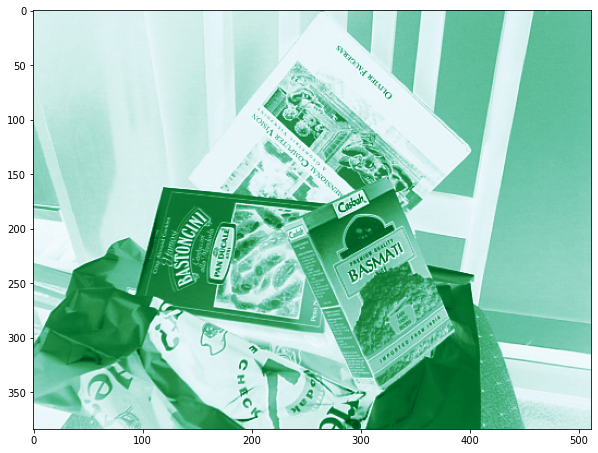

In [72]:
def plot(image, color):
    plt.figure(figsize = (10,10))
    plt.imshow(image, cmap = color)
    #plt.show

    
plot(image_book, 'BuGn')
plot(image_scene, 'BuGn')
#plt.figure()
#plt.imshow(img_disp1)
#plt.title('book.pgm')
#plt.show()

#plt.imshow(img_disp2)
#plt.title('scene.pgm')
#plt.show()

In [73]:
#auxilary 
matches = bf.knnMatch(book_des, scene_des, k=2)
match_candidates = []

threshold = 0.8
#apply threshhold on filter, to match the candidate
for x,y in matches:
    if x.distance < threshold *y.distance:
        match_candidates.append(x)
matches = sorted(match_candidates, key =lambda x:x.distance)
#visualization
img = image_book
img = cv2.drawMatches(image_book,book_kp,image_scene,scene_kp,matches[:10],img,flags=2)


# SIFT

In [74]:
#using package sv2 to define sift
sift = cv2.SIFT_create()
#find keypoints and descriptor for book and scene
book_kp,book_des = sift.detectAndCompute(image_book,None)
scene_kp,scene_des = sift.detectAndCompute(image_scene, None)

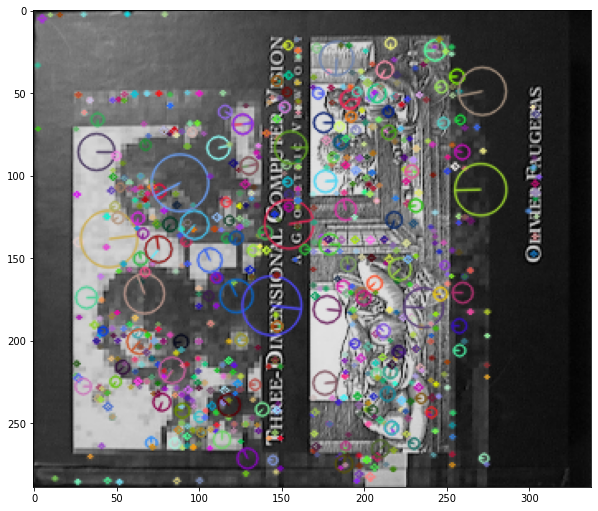

In [75]:
#plot book and scene
book_plot = cv2.drawKeypoints(image_book, book_kp, outImage = None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plot(book_plot, 'gist_gray')


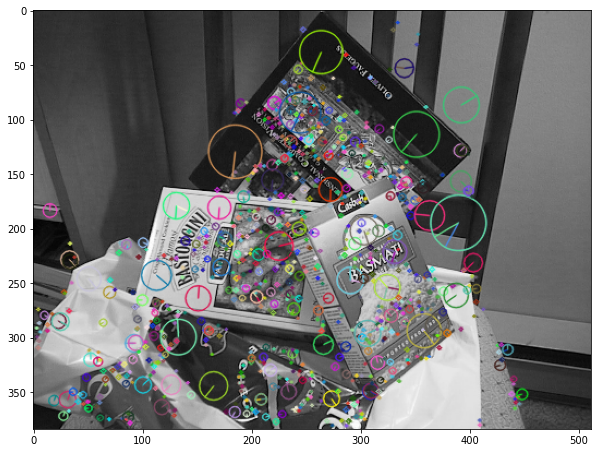

In [76]:
scene_plot = cv2.drawKeypoints(image_scene,scene_kp,outImage = None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plot(scene_plot,'gist_gray')
#plt.axis('off');



# The closest Neighborhood


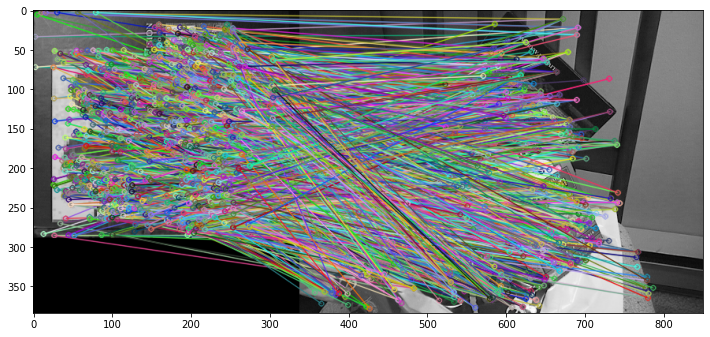

(0.0, 1.0, 0.0, 1.0)

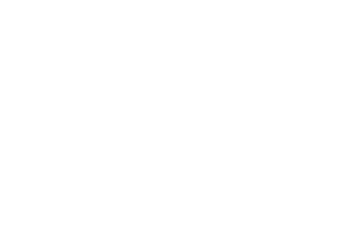

In [77]:
bf = cv2.BFMatcher()
def Match(img_disp1, kp1, des1, img_disp2, kp2, des2):
    matches = bf.knnMatch(queryDescriptors=des1,trainDescriptors=des2, k=2)
    img3 = cv2.drawMatchesKnn(img_disp1,kp1,img_disp2,kp2,matches,None,flags=2)
    plt.figure(figsize=(12,15))
    plt.imshow(img3)
    plt.show()
    
Match(image_book,book_kp,book_des,image_scene, scene_kp, scene_des)
plt.axis('off')

(-0.5, 849.5, 383.5, -0.5)

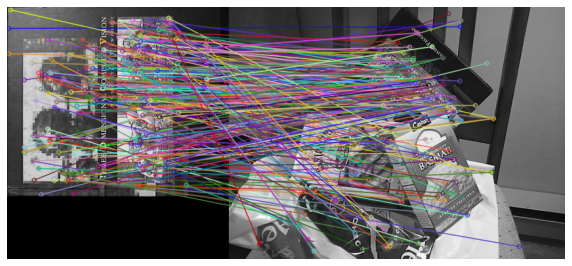

In [78]:
matches = bf.knnMatch(queryDescriptors=book_des,trainDescriptors=scene_des, k=2)
good = []
good_without_list = []
for m,n in matches:
    if m.distance < 0.9*n.distance:
        good.append([m])
        good_without_list.append(m)
matches_img = cv2.drawMatchesKnn(image_book,book_kp,image_scene,scene_kp,good,flags=2,outImg=None)
plot(matches_img, 'gist_gray')
#plt.figure(figsize = (15,15))
#plt.imshow(matches_img,cmap='gray')
plt.axis('off')

max count: 114


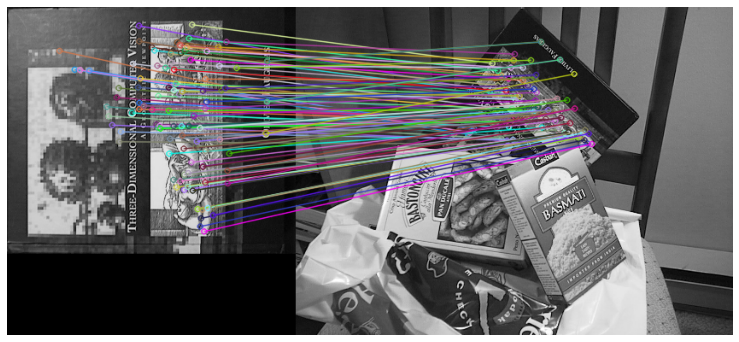

In [79]:
src_pts = np.float32([book_kp[m.queryIdx].pt for m in good_without_list])
dst_pts = np.float32([scene_kp[m.trainIdx].pt for m in good_without_list])

N = 100

max_count = 0
best_inliers = 0
best_q = 0
for i in range(N):
    pick_matches = np.random.choice(range(len(src_pts)), 3)
    A = np.zeros([6,6])
    b = np.zeros([6])
    for j in range(3):
        A[2*j][0] = src_pts[pick_matches[j]][0]
        A[2*j][1] = src_pts[pick_matches[j]][1]
        A[2*j][2] = 1
        A[2*j+1][3] = src_pts[pick_matches[j]][0]
        A[2*j+1][4] = src_pts[pick_matches[j]][1]
        A[2*j+1][5] = 1
        b[2*j] = dst_pts[pick_matches[j]][0]
        b[2*j+1] = dst_pts[pick_matches[j]][1]
    try:
        q = np.linalg.solve(A, b)
    except:
        continue
        
    
    count = 0
    inliers = []
    for j in range(len(src_pts)):
        transform = np.dot(np.array([[src_pts[j][0],src_pts[j][1],1,0,0,0],[0,0,0,src_pts[j][0],src_pts[j][1],1]]),q)
        if np.linalg.norm(transform - dst_pts[j]) < 10:
            count += 1
            inliers.append(good_without_list[j])
    if count>max_count:
        max_count = count
        best_inliers = inliers
        best_q = q
print('max count:',max_count)

matches_img = cv2.drawMatches(image_book,book_kp,image_scene,scene_kp,best_inliers,flags=2,outImg=None)
plt.figure(figsize = (13,13))
plt.imshow(matches_img,cmap='gist_gray');
plt.axis('off');

[]

<Figure size 432x288 with 0 Axes>

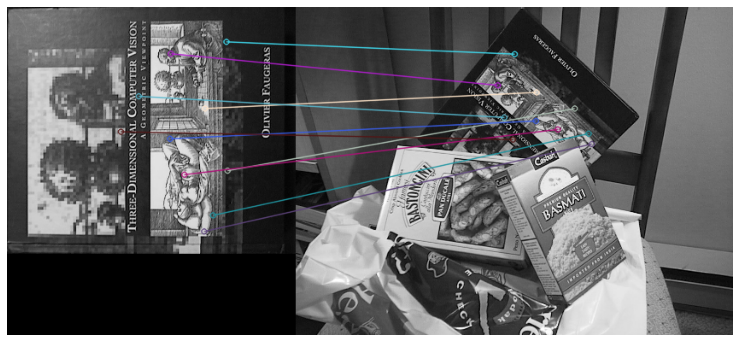

In [80]:
fig = plt.figure()
plt.figure(figsize = (13,13))
plt.axis('off')
plt.imshow(img)
plt.plot()

# Calculating the Homography Matrix 

In [81]:
#auxilary 
matches = bf.knnMatch(book_des, scene_des, k=2)
match_candidates = []

threshold = 0.8
#apply threshhold on filter, to match the candidate
for x,y in matches:
    if x.distance < threshold *y.distance:
        match_candidates.append(x)
matches = sorted(match_candidates, key =lambda x:x.distance)
#visualization
img = image_book
img = cv2.drawMatches(image_book,book_kp,image_scene,scene_kp,matches[:10],img,flags=2)


In [82]:
from scipy import linalg
import random

def homogeneous(H):
    return np.append(H, np.ones((H.shape[0],H.shape[1],1)),axis=2)


#process data
candidates = np.array(match_candidates)
src = np.array([book_kp[match.queryIdx].pt for match in candidates])
src = src.reshape(-1,1,2)
src = homogeneous(src)
#dataset
dst = np.array([scene_kp[match.trainIdx].pt for match in candidates])
dst = dst.reshape(-1,1,2)
dst = homogeneous(dst)
data = []
for i in range(len(src)):
    data.append([src[i],dst[i]])
best_cnt = 0
#size
sz = len(data)

#inliers
for round in range(100):
    inliers = []
    #pack 3 pairs of (src, dst) into one sample

    idx = random.sample(data,3)
    A = np.zeros((1,6))
    tvec = np.zeros((1,1))
    for i in range(3):
        A = np.append(A, np.append(idx[i][0],np.zeros((1,3)),axis =1),axis = 0)
        A = np.append(A, np.append(np.zeros((1,3)),idx[i][0],axis=1),axis = 0)
        tvec = np.append(tvec, idx[i][1].reshape((3,1))[:-1],axis=0)
    A = A[1:,:]
    tvec = tvec[1:,:]
    try:
        solution = np.linalg.solve(A,tvec)
    except:
        continue
    for i in range(sz):
        x = solution.reshape((2,3)).dot(data[i][0].T).reshape((1,2))
        y = np.delete(data[i][1],2,axis=1).reshape((1,2))
        if np.linalg.norm(x-y)<10:
            inliers.append(i)
    if len(inliers) > best_cnt:
        best_inliers = inliers
        best_cnt = len(inliers)
        best_solution = solution
        
print('inliers:\n', best_cnt)
best_solution = best_solution.reshape((2,3))
print('RANSAC value:\n', best_solution)
homography, mask = cv2.findHomography(src,dst,cv2.RANSAC,ransacReprojThreshold =2.0)
print('Homography Matrix:\n',homography)

#f, axarr = plt.subplots(1,3)

pose = cv2.warpAffine(image_book, best_solution.reshape((2,3)),(image_scene.shape[1], image_scene.shape[0]))

#axarr[0].imshow(pose)

sz = len(best_inliers)
A = np.zeros((1,6))
tvec = np.zeros((1,1))
idx = data 

for p in range(sz):
    i = best_inliers[p]
    A = np.append(A, np.append(idx[i][0], np.zeros((1,3)), axis=1), axis = 0)
    A = np.append(A, np.append(np.zeros((1,3)), idx[i][0], axis =1), axis = 0)
    tvec = np.append(tvec, idx[i][1].reshape((3,1))[:-1],axis=0)
A = A[1:, :]
tvec = tvec[1:, :]
refit_solution = (np.linalg.lstsq(A,tvec,rcond=None)[0])
#refit_solution = (np.linalg.lstsq(A,tvec)[0])

print('refit_solution:', refit_solution.reshape((2,3)))
pose = cv2.warpAffine(image_book, refit_solution.reshape((2,3)),(image_scene.shape[1], image_scene.shape[0]))

#f, axarr = plt.subplots(1,2)
#axarr[1].imshow(pose)
#axarr[2].imshow(image_scene, rcond=None)

inliers:
 109
RANSAC value:
 [[  0.42865824   0.45317194 128.58414648]
 [ -0.47878008   0.41555435 160.88240531]]
Homography Matrix:
 [[ 2.90240175e-01  4.45144054e-01  1.41707695e+02]
 [-4.66799877e-01  3.97871393e-01  1.53512491e+02]
 [-3.42747293e-04  7.23323163e-05  1.00000000e+00]]
refit_solution: [[  0.40077904   0.45227607 135.13847789]
 [ -0.45571727   0.41782551 155.40689608]]


(-0.5, 511.5, 383.5, -0.5)

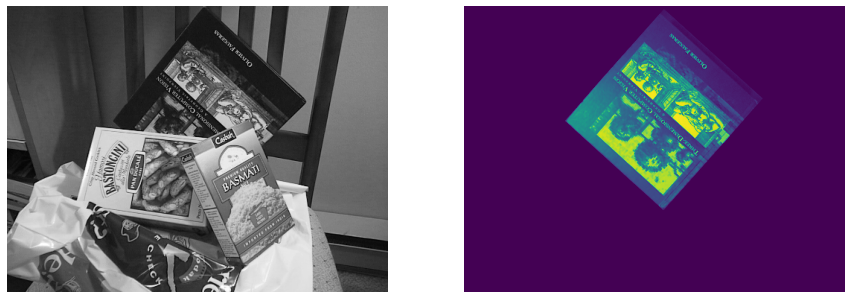

In [83]:
H = np.zeros([3,3])
H[0][0] = best_q[0]
H[0][1] = best_q[1]
H[0][2] = best_q[4]
H[1][0] = best_q[2]
H[1][1] = best_q[3]
H[1][2] = best_q[5]
H[2][2] = 1
H = best_q.reshape(2,3)

pose = cv2.warpAffine(image_book, H, (image_scene.shape[1], image_scene.shape[0]))
#plt.imshow(pose)

fig, axs = plt.subplots(1, 2, figsize=(15, 8))
axs[1].imshow(pose)
axs[1].axis('off')
axs[0].imshow(image_scene,cmap='gist_gray')
axs[0].axis('off')